# Strip Theory Coding Example

_'**Strip Theory** combines two-dimensional flows to estimate the flow on slender three-dimensional objects. The flow is sliced into strips, such that the change in geometry from one strip to the next is small, and the flow is mostly confined to the plane of the slice. This is a very powerful technique for speeding up numerical calculations or estimating 3D forces from 2D tabulated results, but requires care in it's application.'_

## Added Mass of Rugby Ball 🏉
### Generating 🏉 Shape and 🔪 it
So, let's find the added mass of the rugby ball using strip theory. The rugby ball shape is known as a prolate ellipsoid(plot on the left), so the equation defining the shape would be: 

$$
\frac{x^2}{a^2}+\frac{y^2}{a^2}+\frac{z^2}{b^2} = 1
$$

When this geometry is sliced parallel to YZ-plane, it becomes as shown on right.

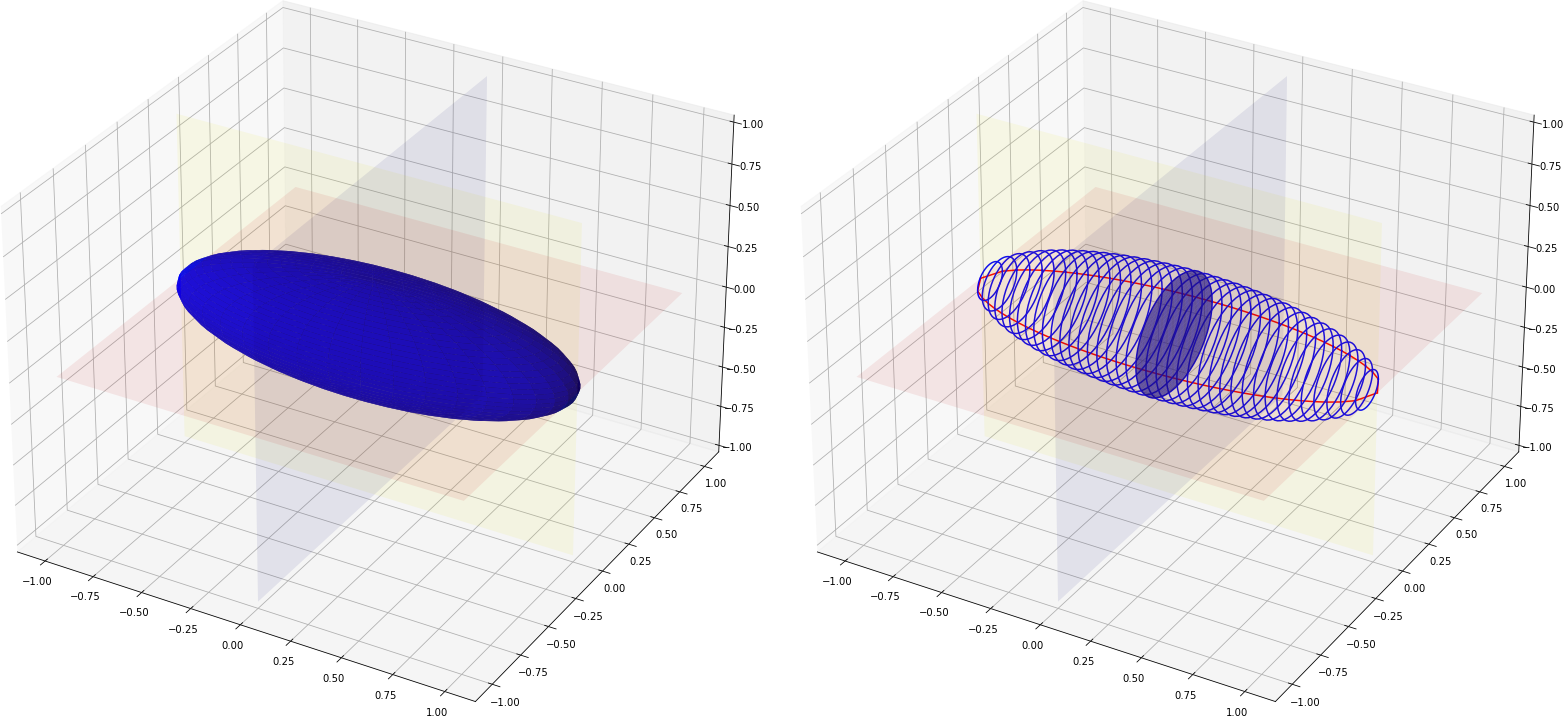

Note that when we slice as shown in right figure, each section becomes a circle.

Now we need to solve added mass $m_{11}^s$ for each circle of each section. Then, add up those together to get the added mass of the full body.

The added mass of a circle is defined as:
$$
m_{11} = \pi \rho r^2
$$

The $r$ depends on each strip location on the z-axis. This $r$ can be found by using the ellipse shown in red which is defined as:

$$
\frac{z^2}{a^2} + \frac{r^2}{b^2} = 1
$$

By rearranging this equation to get $r$ value, we get:

$$
r = \pm\sqrt{b^2 \left(1 - \frac{z^2}{a^2}\right)}
$$

Now we have everything to get $r$ values for each slice, so let's write a code for it!

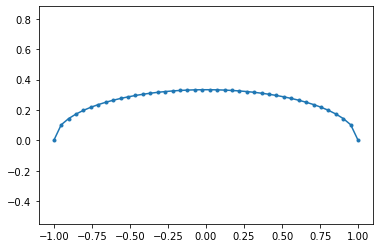

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 1        # Semi major axis
b = 1/3      # Semi minor axis
slices = 42  # Number of slices

# Make a list of 'z' values with given number of 'slices'
z = np.linspace(-1,1,slices)

# Make a list of 'r' values at given z locations
r = [np.sqrt((1 - zs**2/a**2) * b**2) for zs in z]

# Now, let's check by plotting it
plt.axis('equal')
plt.plot(z, r, marker='.')
plt.show()

Just a quick note for those who have never seen the for loop in one line. This
``` python
r = [np.sqrt((1 - zs**2/a**2) * b**2) for zs in z]
```
this is the same thing as
``` python
r = []
for zs in z:
    r.append(np.sqrt((1 - zs**2/a**2) * b**2))
```
but written in a more compact and neat looking way. In python, many things can be done in one line which can be convenient!

### $\bf{\it{m_{11}}}$ of Rugby Ball 🔃
Now we can compute the $m_{11}^s$ for each strip. As the strip theory is defined as:
$$
m_{11} = \int m_{11}^{s}dz
$$

We can use the trapezoid rule to add up each strip's added mass $m_{11}^s$ to get the whole body's added mass $m_{11}$. Using [`np.trapz()`](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html#numpy.trapz), we can get the integral as below:

In [ ]:
rho = 1025  # Density of water
m11s = [np.pi * rho * x * x for x in r]
m11 = np.trapz(m11s, z)
print(f"m11 = {m11}")

Now we have $m_11$ of our rugby ball!

### $\bf{\it{m_{66}}}$ of Rugby Ball 🔄
Similary solve $m_{66}$ of the same rugby ball. This is defined as:
$$
m_{66} = \int m_{11}^s z^2 dz
$$

In [ ]:
m11szz = [m11s[i] * z[i] * z[i] for i in range(len(m11s))]  # instead of z**2, it's faster to compute z * z
m66 = np.trapz(m11szz, z)
print(f"m66 = {m66}")

# Added Mass of Cuboid!
Now try calculating the added mass of cuboid using strip theory!